# Felipe Veloso Análisis lineal discriminante

## Ejercicio 1: Preparación de ambiente de trabajo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('seaborn')

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import LabelEncoder ,StandardScaler, LabelBinarizer #this post
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('default_credit.csv').drop('index',axis=1)
df['default'] = LabelEncoder().fit_transform(df['default'])
df['student'] = LabelEncoder().fit_transform(df['student'])

In [4]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


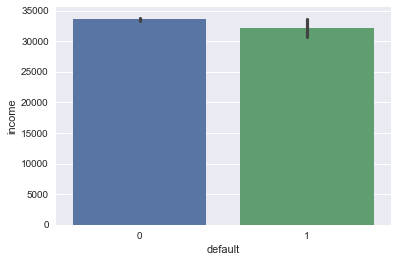

In [5]:
sns.barplot(data=df, x=df['default'], y='income')

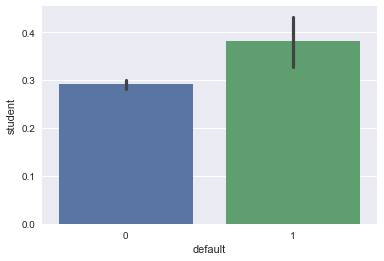

In [6]:
sns.barplot(data=df, x=df['default'], y='student')

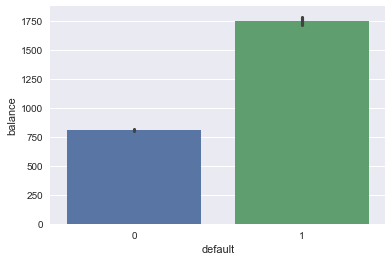

In [7]:
sns.barplot(data=df, x=df['default'], y='balance')

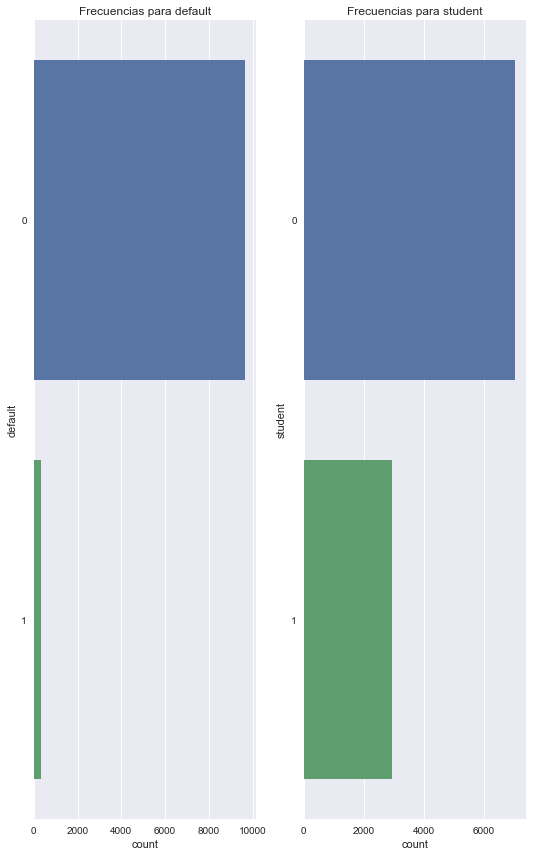

In [27]:
plt.figure(figsize=(15,12))

for n,i in enumerate(['default','student']):
    plt.subplot(1,4,n+1)
    sns.countplot(y=df[i], order=df[i].value_counts().index)
    plt.title('Frecuencias para {}'.format(i))
    plt.tight_layout()

# Ejercicio 2: Modelo base

In [9]:
df['default'] = LabelEncoder().fit_transform(df['default'])
df['student'] = LabelEncoder().fit_transform(df['student'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:4], df['default'], test_size=.33 , random_state=145)

In [11]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [12]:
predict = lda_model.predict(X_test)

In [13]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3187
           1       0.76      0.31      0.44       113

    accuracy                           0.97      3300
   macro avg       0.87      0.65      0.71      3300
weighted avg       0.97      0.97      0.97      3300



las metricas para producir un resultado para default, no se ven muy bien dado que la data que poseemos esta extremadamente sesgada hacia una de las opciones

# Ejercicio 3: Refactorización 1 - información a priori

In [14]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

In [15]:
lda_model_50 = LinearDiscriminantAnalysis(priors=(.5,.5))
lda_model_50.fit(X_train,y_train)
predict_50 = lda_model_50.predict(X_test)

In [16]:
print(classification_report(y_test,predict_50))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      3187
           1       0.15      0.92      0.26       113

    accuracy                           0.83      3300
   macro avg       0.58      0.87      0.58      3300
weighted avg       0.97      0.83      0.88      3300



In [17]:
lda_model_60 = LinearDiscriminantAnalysis(priors=(.4,.6))
lda_model_60.fit(X_train,y_train)
predict_60 = lda_model_60.predict(X_test)

In [18]:
print(classification_report(y_test,predict_60))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87      3187
           1       0.13      0.95      0.23       113

    accuracy                           0.78      3300
   macro avg       0.56      0.86      0.55      3300
weighted avg       0.97      0.78      0.85      3300



Realmente el modelo no mejora modificando su distribucion

# Ejercicio 4: Refactorización 2 - oversampling

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
from imblearn.over_sampling import SMOTE
# Instanciamos la clase
oversampler = SMOTE(random_state=11238, ratio='minority')
# generamos el eversampling de la matriz de entrenamiento y
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

In [21]:
lda_model.fit(X_train_oversamp,y_train_oversamp)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [22]:
predict = lda_model.predict(X_test)

In [23]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      3187
           1       0.16      0.91      0.27       113

    accuracy                           0.83      3300
   macro avg       0.58      0.87      0.58      3300
weighted avg       0.97      0.83      0.88      3300



La creacion de oversampling, no ayudo a mejorar la situacion, se ve un pesimo desempeño predictor

# Ejercicio 5: Refactorización 3 - QDA

In [24]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train,y_train)
qda_predict = qda_model.predict(X_test)

In [25]:
print(classification_report(y_test,qda_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3187
           1       0.74      0.35      0.47       113

    accuracy                           0.97      3300
   macro avg       0.86      0.67      0.73      3300
weighted avg       0.97      0.97      0.97      3300



Al refactorizar e intentar por un analisis discriminativo cuadratico, se aprecian metricas un poco mejor,aun asi el error inicial